# Classification 2

## Exercise 1: Exploratory Data Analysis

### Overview

The objective of this course is to build models to predict customer churn for a fictitious telco company. Before we start creating models, let's begin by having a closer look at our data and doing some basic data wrangling.

Go through this notebook and modify the code accordingly (i.e. #TASK) based on the text and/or the comments.

### Data
Download data from here:
https://public.dhe.ibm.com/software/data/sw-library/cognos/mobile/C11/data/Telco_customer_churn.xlsx

Description of data (for a newer version)
https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

### Importing Libraries

In [19]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
# TASK: Import visualization libraries, matplotlib and seaborn using standard aliases plt and sns respectively

import warnings

# silence all warnings
warnings.filterwarnings("ignore")

# plotting settings
plt.style.use(['seaborn-paper'])
plt.rcParams['font.family'] = 'helvetica'

### Reading in the Data

In [20]:
# TASK: Read in the Excel file. Use the parameter na_values=" " to convert any empty cells to a NA value.
# You may also need to use parameter engine='openpyxl') in newer versions of pandas if you encounter an XLRD error.
data = pd.read_excel('../../data/raw/Telco_customer_churn.xlsx', na_values='NA',engine='openpyxl') # TASK: Use pandas to read in an Excel file. 

data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [21]:
# Define columns to keep and filter the original dataset
cols_to_keep = ['CustomerID', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label']
data = data[cols_to_keep]

In [4]:
# TASK: Rename the multi-worded columns to remove the space 
# HINT: You can either manually remove the spaces in the column name list or use a loop to remove the space
data.columns = [('').join(col.split(' ')) for col in data.columns]
data.columns

Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'TenureMonths', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'ChurnLabel'],
      dtype='object')

### Basic Information

In [6]:
# TASK: Display the number of rows and columns for the dataset
print("Rows & Columns: {}".format(data.shape))

Rows & Columns: (7032, 21)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   TenureMonths      7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# TASK: Display the datatypes for the columns in the dataframe i.e. use the dtypes variable
# How many columns are numerical and how many are non-numerical
obj_cols = data.select_dtypes(include="object").columns
print("Number of non-numerical columns: {}".format(len(obj_cols)))

num_cols = data.select_dtypes(exclude="object").columns
print("Number of numerical columns: {}".format(len(num_cols)))

# check that cat + num = total
assert(len(obj_cols) + len(num_cols) == len(data.columns))

data.dtypes


Number of non-numerical columns: 24
Number of numerical columns: 9


CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

In [27]:
# TASK: use count() on the dataframe to count the number of entries for each of the column. Are there any columns with missing values?
print(data.count())

# to check for missing % 
print("\n")
print(data.isnull().mean())     # TotalCharges has null values, but relatively small 0.001562
                    # ChurnReason has ~73% mising values


CustomerID          7043
Gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
TenureMonths        7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
ChurnLabel          7043
dtype: int64


CustomerID          0.0
Gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
TenureMonths        0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
Tota

In [28]:
# TASK: Use nunique() on the dataframe to count the number of unique values for each of the columns
print(data.nunique())

CustomerID          7043
Gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
TenureMonths          73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
ChurnLabel             2
dtype: int64


In [29]:
data.iloc[20,2:]


SeniorCitizen                              No
Partner                                   Yes
Dependents                                Yes
TenureMonths                                7
PhoneService                              Yes
MultipleLines                              No
InternetService                   Fiber optic
OnlineSecurity                             No
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                                No
StreamingTV                                No
StreamingMovies                            No
Contract                       Month-to-month
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          75.15
TotalCharges                            496.9
ChurnLabel                                Yes
Name: 20, dtype: object

In [30]:
data.head(10)

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,TenureMonths,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ChurnLabel
0,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
1,9237-HQITU,Female,No,No,Yes,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
2,9305-CDSKC,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
3,7892-POOKP,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
4,0280-XJGEX,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
5,4190-MFLUW,Female,No,Yes,No,10,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes
6,8779-QRDMV,Male,Yes,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
7,1066-JKSGK,Male,No,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
8,6467-CHFZW,Male,No,Yes,Yes,47,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes
9,8665-UTDHZ,Male,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.2,Yes


TASK: Display first few values of the dataframe
Based on this and the previous display, how would you describe the columns with a small number (less than 10) of unique values?

Based from above, we can say that all the customers are in the same country and state. Most of the columns are categorical like <code>Gender</code> with *Male* or *Female* values, <code>SeniorCitizen</code> with *Yes* or *No* values, <code>ChurnLabel</code> with Yes or No with equivalent <code>ChrunValue</code> of 1 or 0 respectively, etc. It can be observed that there are columns with many different unique values such as the <code>CustomerID</code> which makes sense as each customer should have its own unique id. <code>ZipCode</code>, <code>Latitude</code> and <code>Longitude</code> which have the same number of possible values make sense as the state has the limited number of zip codes.

We have also observed that there are continuous values in the columns: <code>TotalCharges</code> and <code>MothlyCharges</code> and discrete values in the column <code>TenureMonths</code> which indicates the number of months that the customer use the Telco service.

In [31]:
# TASK: Let's analyze the values for the categorical features (columns with less than 10 unique values)
for id, row in data.nunique().iteritems(): # this counts the number of unique values for each feature and returns the result as a dictionary
    if(row < 10):
        # TASK: Print out the unique values for the feature
        print("{}\t{}".format(id, row))

Gender	2
SeniorCitizen	2
Partner	2
Dependents	2
PhoneService	2
MultipleLines	3
InternetService	3
OnlineSecurity	3
OnlineBackup	3
DeviceProtection	3
TechSupport	3
StreamingTV	3
StreamingMovies	3
Contract	3
PaperlessBilling	2
PaymentMethod	4
ChurnLabel	2


In [32]:
# For columns with 3 or 4 unique values, display them to see if they make sense
for col in ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', "PaymentMethod"]:
    print("{} : {}".format(col, np.unique(data[col].values)))

MultipleLines : ['No' 'No phone service' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'No internet service' 'Yes']
OnlineBackup : ['No' 'No internet service' 'Yes']
DeviceProtection : ['No' 'No internet service' 'Yes']
TechSupport : ['No' 'No internet service' 'Yes']
StreamingTV : ['No' 'No internet service' 'Yes']
StreamingMovies : ['No' 'No internet service' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check']


**Observations**

- The value 'No phone service' found in MultipleLines is already captured by the PhoneService feature ('No' value)
- The value 'No internet service' found in the several features is already captured by InternetService feature ('No' value)
- Values that are longer or more complex may need to be simplified.

Conclusion: These values can be considered duplicated information as they are found in the PhoneService and InternetService features. There are several options to consider here:

- Retain all features and values as is
- Convert the 'No Internet Service'/'No phone service' to 'No' in the features as PhoneService and InternetService features has already captured this information
- Remove the PhoneService feature as MultipleLines feature has this information. To remove the InternetService feature, we would have to 'fold in' the values in the other features e.g. the values for OnlineSecurity could be changed to ['DSL_No','DSL_Yes','FiberOptic_No','FiberOptic_Yes','No internet service']

For this course, we will be using the second option (without justification). You are encouraged to test the others options during modelling to see if there are any impact.

### Data Wrangling

Based on the discoveries made above, we will be modifying our data before continuing the exploration.

In [34]:
# Replace 'No phone service'
data['MultipleLines'] = data['MultipleLines'].replace({'No phone service':'No'})

In [35]:
# TASK: Replace 'No internet service'
for col in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
    # similar to the operation for 'No phone service' above
    data[col] = data[col].replace({'No internet service':'No'})

In [36]:
# Simplify the values made up of phrases
data['PaymentMethod'] = data['PaymentMethod'].replace({
    'Bank transfer (automatic)':'transfer',
    'Credit card (automatic)':'creditcard',
    'Electronic check':'echeck',
    'Mailed check':'mcheck'
})

data['InternetService'] = data['InternetService'].replace({
    'Fiber optic':'FiberOptic'
})

data['Contract'] = data['Contract'].replace({
    'Month-to-month':'M2M',
    'One year':'OneYear',
    'Two year':'TwoYear'
})

In [37]:
# Remove the rows with empty TotalCharges value
data = data[data["TotalCharges"].notnull()]

In [38]:
data.shape

(7043, 21)

In [39]:
data.info()
# we can see that the TotalCharges column is of object data type, we must change it into float 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   TenureMonths      7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [40]:
# After data wrangling, repeat prints
print("Rows & Columns: {}".format(data.shape))
print("################################################")
# Number of unique values for each of the columns
print(data.nunique())
print("################################################")
# Check the data types
print(data.dtypes)
print("################################################")
# Display first few values
print(data.head())

Rows & Columns: (7043, 21)
################################################
CustomerID          7043
Gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
TenureMonths          73
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
ChurnLabel             2
dtype: int64
################################################
CustomerID           object
Gender               object
SeniorCitizen        object
Partner              object
Dependents           object
TenureMonths          int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
T

In [41]:
# Randomly display 1 row from the dataframe
print(data.sample(n=1).iloc[0])

CustomerID          1169-WCVAK
Gender                    Male
SeniorCitizen               No
Partner                    Yes
Dependents                  No
TenureMonths                19
PhoneService               Yes
MultipleLines              Yes
InternetService     FiberOptic
OnlineSecurity             Yes
OnlineBackup               Yes
DeviceProtection            No
TechSupport                Yes
StreamingTV                 No
StreamingMovies             No
Contract                   M2M
PaperlessBilling           Yes
PaymentMethod       creditcard
MonthlyCharges            88.8
TotalCharges           1672.35
ChurnLabel                  No
Name: 6137, dtype: object


In [42]:
# TASK: Save the data as a CSV fiile
data.to_csv("../../data/interim/0telco_churn.csv", index=False)

### Additional Exploration

**TASK:** This is the open-ended section of the exercise. Use any exploration techniques that you know to further explore and understand your data. We expect a number of visualizations that can show the relationships between features as well as between features and the outcome variable 'ChurnLabel'. Some of the questions in the quiz may require you to perform additional analyses.


From the initial exploration above, the following questions have been answered:
* What is the shape of your data? Number of rows and columns.
* How many of the columns are numerical and how many are categorical?
* What is the name of the column to be predicted?
* For the numerical columns, how many missing values are there for each column?
* For the categorical columns, how many missing values are there for each column?

However, we will still need to do further exploration using visualizations to better understand the data using the following questions as the goal:
* For the numerical columns, what does the distributions look like?
* How are the various attributes correlated to the outcome variable?
* What visualizations can you use to highlight outliers in the data?


**Recapping on the columns**

Before we begin to decide on the type of visualisations to use to aim our understanding, let's recap on the columns we have and the data type of it.

In [43]:
print("Categorical columns: {}\n".format(obj_cols))
print("Numerical columns: {}\n".format(num_cols))
print("Total columns: {} categorical, {} numerical.".format(len(obj_cols), len(num_cols)))

Categorical columns: Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'TotalCharges', 'ChurnLabel'],
      dtype='object')

Numerical columns: Index(['TenureMonths', 'MonthlyCharges'], dtype='object')

Total columns: 19 categorical, 2 numerical.


**Utilities Functions**

Let's define some helper functions that will help us iterate through all the columns with same datatype.

findfont: Font family ['helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['helvetica'] not found. Falling back to DejaVu Sans.


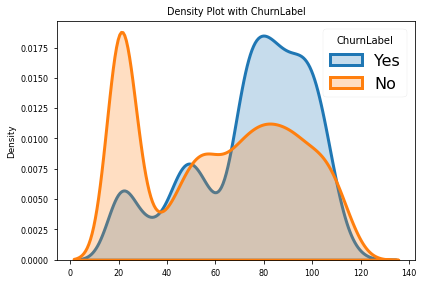

In [44]:
# Example: Look at Churn vs MonthCharges
plt.clf()
for label in ['Yes','No']:
    subset = data[data.ChurnLabel==label]
    
    # Draw the density plot
    sns.distplot(subset['MonthlyCharges'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3, 'shade':True},
                 label = label)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'ChurnLabel')
plt.title('Density Plot with ChurnLabel')
plt.xlabel('') # Monthly Charges
plt.ylabel('Density')
plt.show()

In [ ]:
# Additional Exploration